### Try out GeoPandas

Based on [GeospatialProgramming's Youtube Video](https://www.youtube.com/watch?v=oFajY3FOq6A&list=PL8ApLBFiTZlxcndXfHOtwq1vQMzuiMlN_) and [their GitHub](https://github.com/GeospatialProgramming/Geopandas/tree/main/Intro%20to%20Geopandas).

In [1]:
import pandas as pd
import geopandas as gpd

In [22]:
# Links to pull data from the DC OpenData portal

neighborhood_laydown = "https://opendata.arcgis.com/datasets/f6c703ebe2534fc3800609a07bad8f5b_17.geojson"
# If this url fails, you can download the geojson from here: https://dc.esri.com/datasets/dcdev::dc-neighborhood-clusters-1"
# -> I did download it manually, as I got an error because /vsicurl/ was added to the url path
# (may be related to the GDAL library?)


# downloaded datasets manually as well. Not elegant but worked (therefore location in folder)
# datasets = {
#     "2021": "https://opendata.arcgis.com/datasets/da3da798fb4f4f0e9de5c3a17c39351f_10.geojson",
#     "2020": "https://opendata.arcgis.com/datasets/ac617c291bbd466bbbea6272f87811d3_8.geojson",
#     "2019": "https://opendata.arcgis.com/datasets/107f535e5d3347a8ac1e46dbc13669d4_6.geojson",
#     "2018": "https://opendata.arcgis.com/datasets/ca581e1b455a46caa266e3476f8205d2_0.geojson",
#     "2017": "https://opendata.arcgis.com/datasets/585c8c3ef58c4f1ab1ddf1c759b3a8bd_39.geojson",
#     "2016": "https://opendata.arcgis.com/datasets/2dc1a7dbb705471eb38af39acfa16238_28.geojson", 
#     "2015": "https://opendata.arcgis.com/datasets/b3283607f9b74457aff420081eec3190_29.geojson",
#     "2014": "https://opendata.arcgis.com/datasets/54b57e15f6944af8b413a5e4f88b070c_13.geojson",
#     "2013": "https://opendata.arcgis.com/datasets/3d49e06d51984fa2b68f21eed21eba1f_14.geojson",
#     "2012": "https://opendata.arcgis.com/datasets/9cbe8553d4e2456ab6c140d83c7e83e0_15.geojson"
# }

datasets = {
    "2021": "data/Construction_Permits_in_2012.geojson",
    "2020": "data/Construction_Permits_in_2013.geojson",
    "2019": "data/Construction_Permits_in_2014.geojson",
    "2018": "data/Construction_Permits_in_2015.geojson",
    "2017": "data/Construction_Permits_in_2016.geojson",
    "2016": "data/Construction_Permits_in_2017.geojson", 
    "2015": "data/Construction_Permits_in_2018.geojson",
    "2014": "data/Construction_Permits_in_2019.geojson",
    "2013": "data/Construction_Permits_in_2020.geojson",
    "2012": "data/Construction_Permits_in_2021.geojson"
}


## Read in the Neighborhood Laydown

In [18]:
gdf_neigh = gpd.read_file("data/Neighborhood_Clusters.geojson")

In [19]:
gdf_neigh.head()

,OBJECTID,WEB_URL,NAME,NBH_NAMES,TYPE,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,SHAPEAREA,SHAPELEN,geometry
0,1,http://planning.dc.gov/,Cluster 16,"Colonial Village, Shepherd Park, North Portal ...",Original,{8D235E97-D58C-4891-943E-307143103BD9},NaN,NaN,NaN,NaN,0,0,"POLYGON ((-77.02829 38.98608, -77.02952 38.987..."
1,2,NaN,Cluster 41,Rock Creek Park,Additional,{939C23A8-8EE2-4B4F-85EE-88281BCCC9A0},NaN,NaN,NaN,NaN,0,0,"POLYGON ((-77.04391 38.98432, -77.04418 38.984..."
2,3,http://planning.dc.gov/,Cluster 10,"Hawthorne, Barnaby Woods, Chevy Chase",Original,{8EADC8B8-3DAD-4E5D-AAF8-BF63D8316317},NaN,NaN,NaN,NaN,0,0,"POLYGON ((-77.05530 38.95900, -77.05530 38.959..."
3,4,http://planning.dc.gov/,Cluster 17,"Takoma, Brightwood, Manor Park",Original,{5BF4BCEC-5022-4B96-9577-C0246154197C},NaN,NaN,NaN,NaN,0,0,"POLYGON ((-77.01418 38.97237, -77.01403 38.972..."
4,5,NaN,Cluster 40,Walter Reed,Additional,{C6705A7B-212E-419A-93CB-DA60707D0C37},NaN,NaN,NaN,NaN,0,0,"POLYGON ((-77.03286 38.97800, -77.03297 38.978..."


In [8]:
type(gdf_neigh)

geopandas.geodataframe.GeoDataFrame

In [9]:
gdf_neigh.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
gdf_neigh.to_crs(3857).area.sum()
# temporarily change crs to meter-based (instead of degrees) to get the area in square meters

293472467.71598727

<AxesSubplot:>

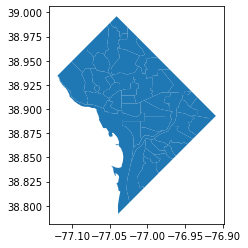

In [11]:
gdf_neigh.plot()

## Read in the Construction Permit Files

In [25]:
from glob import glob

In [38]:
files = glob("data/Construction*")
# glob returns a list of paths matching a pathname pattern

In [39]:
df_list = []
for file in files:
    year = file.split("_")[-1].split('.')[0]
    gdf = gpd.read_file(file)
    gdf['year'] = year
    
    df_list.append(gdf)

In [40]:
gdf = pd.concat(df_list) # create one large GeoDataFrame out of list of dataframes
gdf.shape

(151111, 34)

## Perform a spatial join to add cluster and neighborhood name to the permit data

In [41]:
gdf_join = gdf.sjoin(gdf_neigh[['NAME', 'NBH_NAMES', 'geometry']], how="left", predicate="within")
# primarily interested in construction permits, therefore left join

In [42]:
gdf_join.head(2)

,OBJECTID,APPLICATIONDATE,ISEXCAVATION,ISFIXTURE,ISPAVING,ISLANDSCAPING,ISPROJECTIONS,ISPSRENTAL,TRACKINGNUMBER,PERMITNUMBER,...,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,geometry,year,index_right,NAME,NBH_NAMES
0,172772525,2015-04-27 13:07:08+00:00,F,F,T,F,F,F,109184,NaN,...,{FB7F17C2-990D-20EA-E053-782F520A3502},NaN,NaN,NaN,NaN,POINT (-77.03980 38.94274),2015,7.0,Cluster 18,"Brightwood Park, Crestwood, Petworth"
1,172772526,2015-04-23 14:27:35+00:00,T,F,T,F,F,F,109102,NaN,...,{FB7F17C2-990E-20EA-E053-782F520A3502},NaN,NaN,NaN,NaN,POINT (-77.00699 38.87626),2015,42.0,Cluster 27,"Near Southeast, Navy Yard"


## Create a table of counts per cluster per year

In [43]:
counts_by_year = gdf_join.value_counts(['year', 'NAME']).to_frame().reset_index().sort_values(['NAME', 'year'])

In [44]:
counts_by_year.columns = ['year', 'cluster', 'permit_count'] # reset column names
counts_by_year # fully non-spatial

,year,cluster,permit_count
311,2012,Cluster 1,148
216,2013,Cluster 1,263
192,2014,Cluster 1,300
124,2015,Cluster 1,432
149,2016,Cluster 1,381
...,...,...,...
144,2017,Cluster 9,389
112,2018,Cluster 9,462
117,2019,Cluster 9,450
63,2020,Cluster 9,612


## Convert that table into one row per cluster, with years as columns

In [45]:
pivoted = counts_by_year.pivot(index="cluster", columns='year', values='permit_count')
# basically to_wider 

In [49]:
pivoted

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
cluster,,,,,,,,,,
Cluster 1,148.0,263.0,300.0,432.0,381.0,424.0,416.0,398.0,549.0,419.0
Cluster 10,115.0,187.0,229.0,378.0,337.0,285.0,308.0,331.0,354.0,373.0
Cluster 11,169.0,195.0,230.0,449.0,480.0,388.0,371.0,409.0,409.0,503.0
Cluster 12,84.0,122.0,135.0,137.0,182.0,175.0,174.0,179.0,165.0,266.0
Cluster 13,278.0,342.0,464.0,565.0,582.0,538.0,702.0,500.0,585.0,690.0
Cluster 14,93.0,125.0,175.0,220.0,192.0,162.0,182.0,256.0,361.0,289.0
Cluster 15,135.0,185.0,255.0,271.0,298.0,301.0,284.0,233.0,404.0,433.0
Cluster 16,63.0,107.0,120.0,137.0,102.0,105.0,132.0,149.0,215.0,169.0
Cluster 17,174.0,166.0,232.0,368.0,373.0,431.0,493.0,341.0,469.0,520.0


In [61]:
pivoted_merged = pd.merge(pivoted, gdf_neigh[['NAME', 'NBH_NAMES', 'geometry']], how="left", left_index=True, right_on="NAME")
# add back in the geometries


In [62]:
pivoted_gdf = gpd.GeoDataFrame(pivoted_merged, geometry='geometry', crs=4326)
# turn into GeoDataFrame again

In [63]:
type(pivoted_gdf)

geopandas.geodataframe.GeoDataFrame

## Add the percent change from 2012 to 2021

In [64]:
pivoted_gdf['perc_change'] = (pivoted_gdf['2021'] / pivoted_gdf['2012']) * 100 - 100

In [65]:
top_10 = pivoted_gdf.sort_values('perc_change', ascending=False).head(10)

<AxesSubplot:>

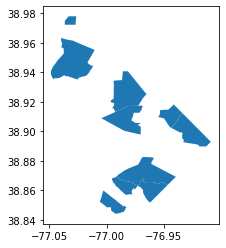

In [66]:
top_10.plot()

## Plot the ten clusters with the highest 'Percent Change'

In [67]:
import matplotlib.pyplot as plt

In [68]:
years = top_10.columns[0:-4]
years

Index(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')

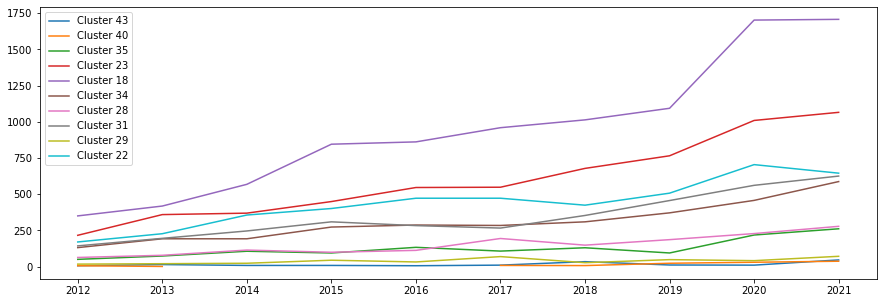

In [69]:
plt.figure(figsize=(15, 5))

for idx, row in top_10.iterrows():
    plt.plot(years, row[years], label=row['NAME'])
plt.legend()

## Plot all neighborhood clusters as a map

<AxesSubplot:>

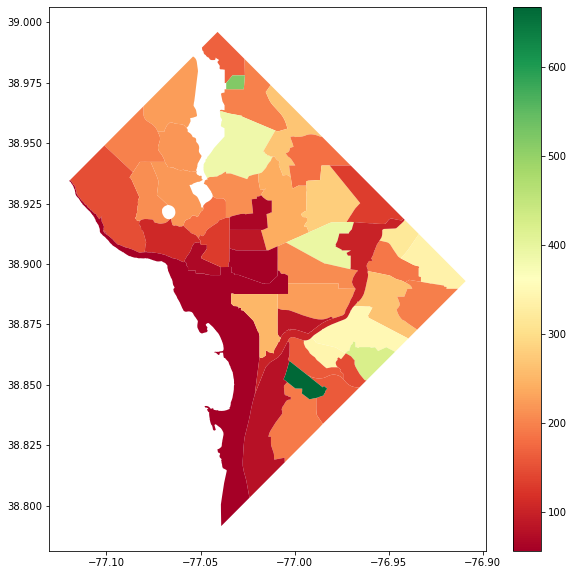

In [73]:
pivoted_gdf.plot(column='perc_change', cmap='RdYlGn', legend=True, figsize=(10, 10))

# Write to file

In [59]:
pivoted_gdf.to_file("construction_counts_by_cluster_by_year.geojson", driver="GeoJSON")